### < center font color = "red" > Exploratory Data Analysis


#### Import Necessary Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from mlxtend.classifier import StackingCVClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from pylab import rcParams


%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')


In [0]:
# Mount the data on drive
import importlib.util
import sys
from google.colab import drive

drive.mount('/content/drive')

## Load the train data
sys.path.insert(0, '/content/drive/Games_data/')
data_add_train = pd.read_csv('/content/drive/My Drive/Games_data/bank-additional-full.csv')


In [3]:
data_add_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Shape of the dataset
data_add_train.shape

(41188, 21)

In [5]:
# Check Missing Values
data_add_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# The data has high class imbalance issue
data_add_train.y.value_counts()

no     36548
yes    4640 
Name: y, dtype: int64

Text(0.5, 1.0, 'Percentage of Subscription in Dataset')

<Figure size 144x144 with 0 Axes>

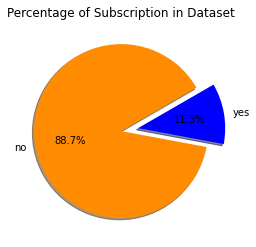

In [8]:
# Let's Visualize the Target Variable
fig = plt.gcf()
fig.set_size_inches(2,2)

# Pie chart
labels = ['no', 'yes']
sizes = [15, 30, 45, 10]
explode = (0, 0.2)  
fig1, ax1 = plt.subplots()

sizes = data_add_train['y'].value_counts(sort = True)
rcParams['figure.figsize'] = 5,5
ss = ['darkorange','blue']
# Plot
plt.pie(sizes, explode=explode,colors = ss,labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Percentage of Subscription in Dataset',)



## Perform Univariate Analysis

In [0]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

#### Which age group are more likely to subscribe?


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

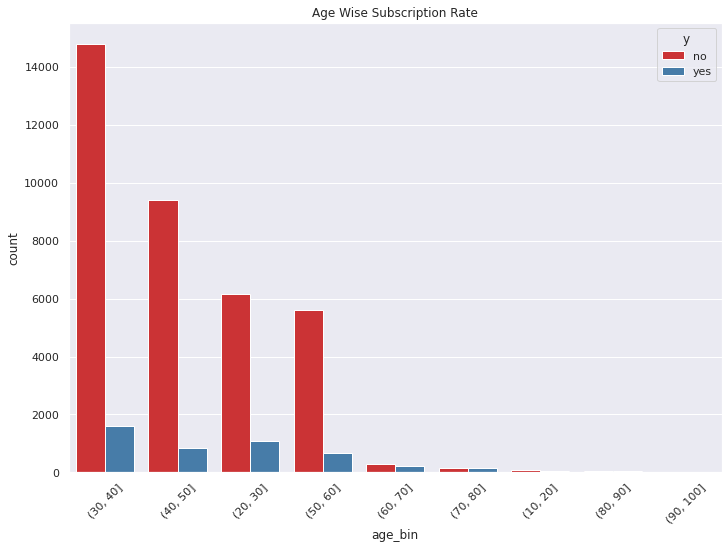

In [13]:
bins = [10,20,30,40,50,60,70,80,90,100]
data_add_train['age_bin'] = pd.cut(data_add_train['age'], bins)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='age_bin',hue='y',data=data_add_train,order = data_add_train['age_bin'].value_counts().index,palette="Set1").set_title('Age Wise Subscription Rate')
plt.xticks(rotation=45)


* From the above chart we could see that, majority of population whose ages between 20's to 50's are moe are inclined towards subscription.  

In [0]:
# Let's Look into the individual difference between subscribers vs non-subscribers
data_add_train_1 = data_add_train.loc[data_add_train['y'] == 'yes']
data_add_train_0 = data_add_train.loc[data_add_train['y'] == 'no']

Text(0.5, 1.0, 'Age Distribution of Non Subscribers')

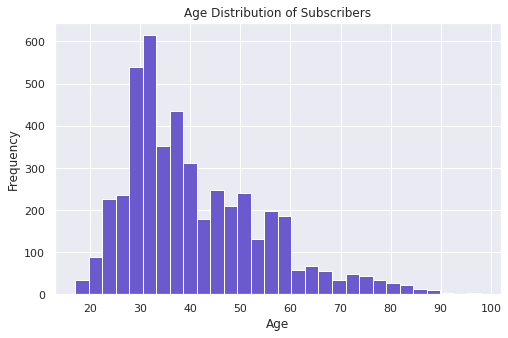

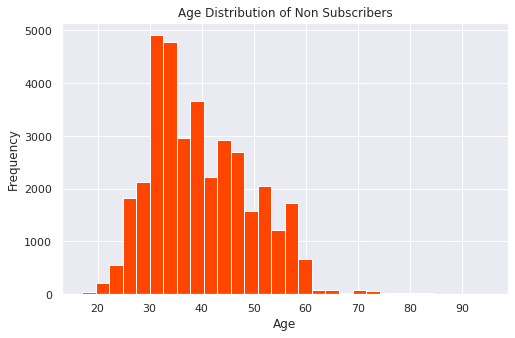

In [15]:
## Distribution of customers who subscribed the term

plt.figure(figsize=[8,5])

data_add_train_1['age'].hist(bins=30,color = 'slateblue')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Age Distribution of Subscribers')

# Age Distriburtion of customers who were not subscribed
plt.figure(figsize=[8,5])
data_add_train_0['age'].hist(bins = 30,color = 'orangered')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Age Distribution of Non Subscribers')

In [40]:
# Filter the data over 60+ and 60- Customers
data_add_train_ = data_add_train.loc[data_add_train['age'] >= 60]
data_add_train_1 = data_add_train.loc[data_add_train['age'] < 60]
data_add_train_['age_type'] = '60+'
data_add_train_1['age_type'] = '60-'

data_add_train_12 = data_add_train_.append(data_add_train_1)
data_add_train_12.groupby(["age_type", "y"]).size()

age_type  y  
60+       no     721  
          yes    472  
60-       no     35827
          yes    4168 
dtype: int64

*  In general banks seems not much interest in campaigning for customers who ages, i.e elderly aged people. But from the above distribution chart it is clearly evident that, elderly customers are not willing to subscribe more compare to the younger ones

### Let's Explore to other feautures


In [0]:
data_add_train['Percent'] = 1 
data = data_add_train.groupby(['job','y']).agg({'Percent': 'sum'})
# state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
dat = data.groupby(['job']).agg({'Percent': 'sum'})
job_y = data.div(dat, level='job') * 100
job_y.reset_index(inplace = True)

In [0]:
job_y = job_y[job_y.job != 'unknown']


In [0]:
df_top = job_y.loc[job_y['Percent'] >= 0.1,
                             ['job', 'y', 'Percent']].pivot(columns='y',
                                                                    index='job',
                                                                    values='Percent')



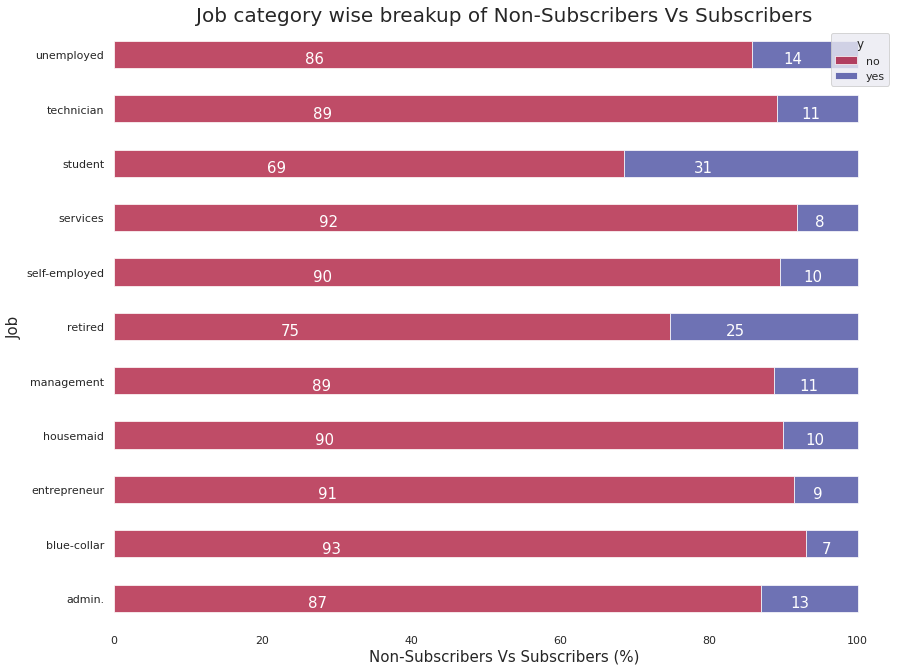

In [46]:
ax = df_top.plot.barh(stacked=True, figsize=(14,11), cmap=plt.cm.get_cmap('RdYlBu'),alpha = 0.7)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 4:
        ax.annotate(f"{width:.0f}", (p.get_x()+0.30*width,
                                     p.get_y()+.17*height), color='white', fontsize=15)

plt.title('Job category wise breakup of Non-Subscribers Vs Subscribers', size=20)
plt.xlabel('Non-Subscribers Vs Subscribers (%)',size=15)
plt.ylabel('Job',size=15)

plt.box(False)


* From the above stacked barchart, it was surprising that, students (31%), retired people (25%) and unemployed (14%) categories show the best relative frequencies of term deposit subscription. Other classes range between 6.9% (blue-collar) and 13.0% (admin.)



In [0]:
## Marital Status
data = data_add_train.groupby(['marital','y']).agg({'Percent': 'sum'})
##  Grouby marital
dat = data.groupby(['marital']).agg({'Percent': 'sum'})


In [0]:
job_y = data.div(dat, level='marital') * 100
job_y.reset_index(inplace = True)
job_y = job_y[job_y.marital != 'unknown']

df_top = job_y.loc[job_y['Percent'] >= 0.1,
                             ['marital', 'y', 'Percent']].pivot(columns='y',
                                                                    index='marital',
                                                                    values='Percent')

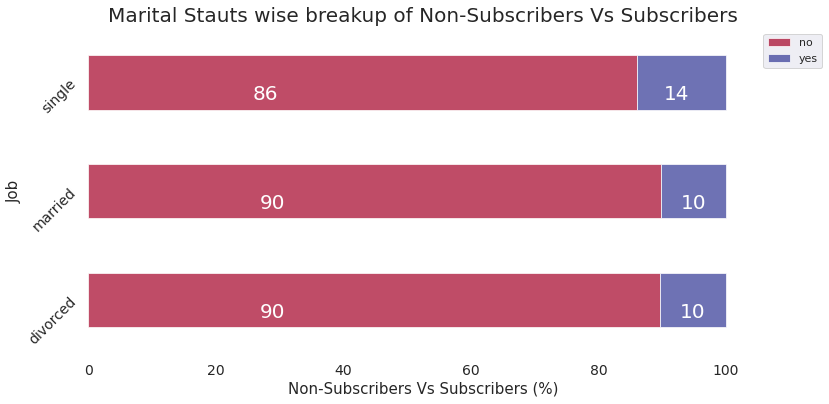

In [25]:
ax = df_top.plot.barh(stacked=True, figsize=(12,6), cmap=plt.cm.get_cmap('RdYlBu'),alpha = 0.7)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 4:
        ax.annotate(f"{width:.0f}", (p.get_x()+0.30*width,
                                     p.get_y()+.17*height), color='white', fontsize=20)

ax.legend(bbox_to_anchor=(1, 1))

plt.title('Marital Stauts wise breakup of Non-Subscribers Vs Subscribers', size=20)
plt.xlabel('Non-Subscribers Vs Subscribers (%)',size=15)
plt.xticks(fontsize=14)#, rotation=90)
plt.yticks(fontsize=14, rotation=45)

plt.ylabel('Job',size=15)

plt.box(False)
#plt.savefig('myfig_columnar')


Singles are slightly to subscribe, nearly (14.0%) to term deposits than others which are around 10%.





In [0]:
## Month
data = data_add_train.groupby(['month','y']).agg({'Percent': 'sum'})
data.reset_index(inplace = True)

In [111]:
data

,month,y,Percent
0,apr,no,2093
1,apr,yes,539
2,aug,no,5523
3,aug,yes,655
4,dec,no,93
5,dec,yes,89
6,jul,no,6525
7,jul,yes,649
8,jun,no,4759
9,jun,yes,559


In [0]:
df_top20 =data[['month', 'y', 'Percent']].pivot(columns='y',index='month',values='Percent')

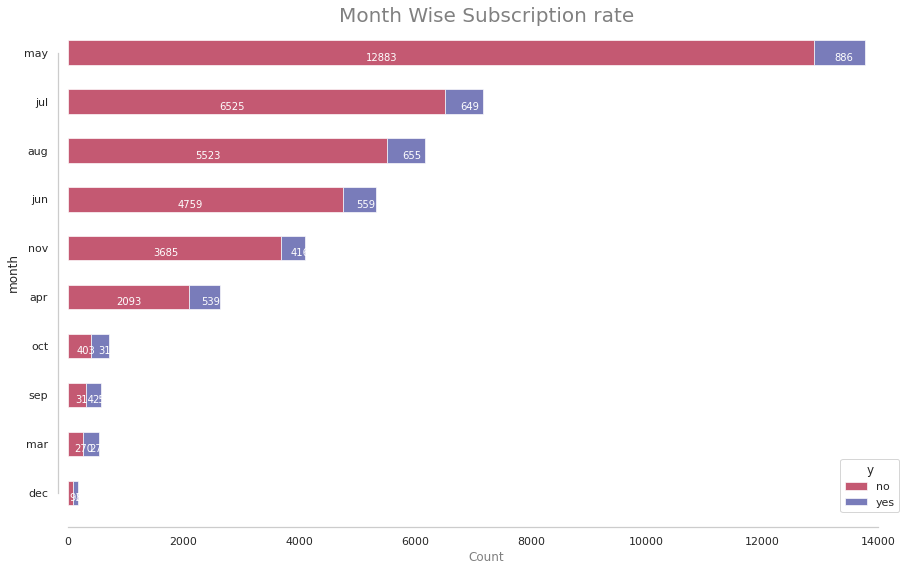

In [57]:

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total'], ascending=[True], inplace=True)
df_top20.drop('total', axis=1, inplace=True)
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines

ax = df_top20.plot.barh(stacked=True, figsize=(15, 9), cmap=plt.cm.get_cmap('RdYlBu'),alpha = 0.65)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='white', fontsize=10)

plt.title('Month Wise Subscription rate', size=20,color="Grey")
plt.xlabel('Count',color="Grey")

sns.despine(offset=10, trim=True); ## This trims the display frames

* In the month May, there is a high subscription rate, Probably this could be begging of financial year and people are more tending to invest on bettern returns. This was continued till August Month

In [136]:
# This data says Customer, who were contacted on Thurday are having high subscription rate
pd.crosstab(data_add_train.day_of_week,data_add_train.y)

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


Text(0.5, 1.0, 'Campaign Distribution of Non Subscribers')

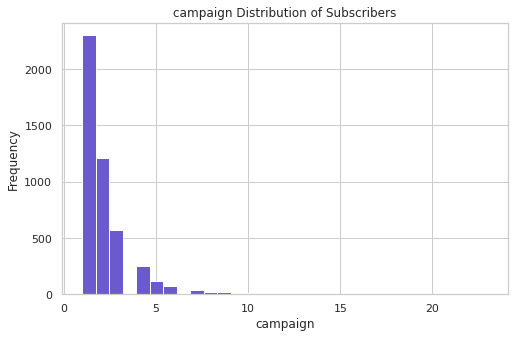

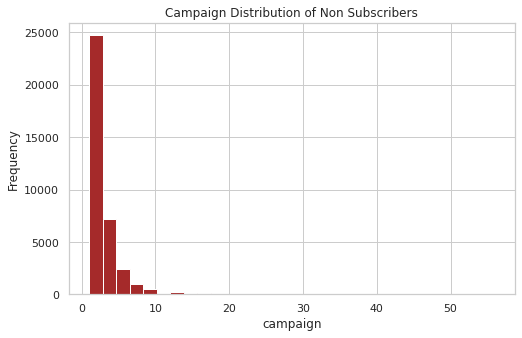

In [190]:
# How Many times we can camapaign at customer
## Distribution of customers who subscribed the term
data_add_train_1 = data_add_train.loc[data_add_train['y'] == 'yes']
data_add_train_0 = data_add_train.loc[data_add_train['y'] == 'no']

plt.figure(figsize=[8,5])

data_add_train_1['campaign'].hist(bins=30,color = 'slateblue')
plt.xlabel('campaign')
plt.ylabel('Frequency')

plt.title('campaign Distribution of Subscribers')

# Age Distriburtion of customers who were not subscribed
plt.figure(figsize=[8,5])
data_add_train_0['campaign'].hist(bins = 30,color = 'brown')
plt.xlabel('campaign')
plt.ylabel('Frequency')

plt.title('Campaign Distribution of Non Subscribers')


* Calling more than ten times a same customer during a single marketing campaign seems excessive. This could also lead sometimes as marketing harassment, but we can consider here as outliers




In [0]:
data_add_train.pdays.value_counts()
data_add_train['pdays'] = data_add_train['pdays'].astype('str')

data_add_train['pdays'] = np.where(data_add_train['pdays']== '999', '0', '1')


In [162]:
# If a customer has already been contacted in previous campaign, how many days passed meanwhile?
# Here, if a customer contacted 999 means, he was not contacted. Let's us make it to Zero

pd.crosstab(data_add_train.pdays,data_add_train.y)


y,no,yes
pdays,,
0,36000,3673
1,548,967


In [0]:
# It seems recontacting a customer after the previous campaign has more chances to increase the chances of subscription

In [166]:
#data_add_train['pdays'] = np.where(data_add_train['pdays']== 999, 0 )
pd.crosstab(data_add_train.pdays,data_add_train.y)
#data_add_train.pdays.value_counts()

y,no,yes
pdays,,
0,5,10
1,18,8
2,24,37
3,141,298
4,55,63
5,17,29
6,123,289
7,20,40
8,6,12


* If we can contact a customer min of three and maximum of six, there a very high chance that client can get subscribe to the term deposit


In [168]:
data.head()

,month,y,Percent
0,apr,no,2093
1,apr,yes,539
2,aug,no,5523
3,aug,yes,655
4,dec,no,93


In [0]:
data_add_train.dtypes

data_add_train['Percent'] = 1
data = data_add_train.groupby(['pdays','y']).agg({'Percent': 'sum'})
data.reset_index(inplace = True)
data = data[data.pdays != 999]

In [0]:
df_top20 = data.loc[data['pdays'] <= 10,['pdays', 'y', 'Percent']].pivot(columns='y',index='pdays',values='Percent')


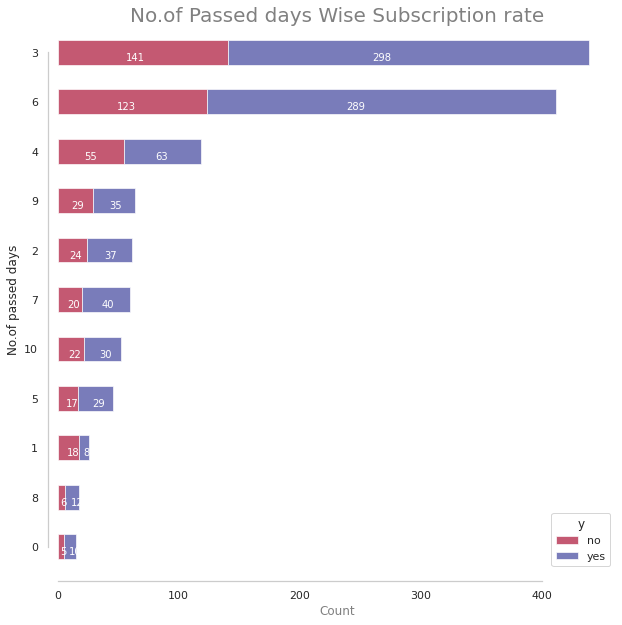

In [30]:
df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total'], ascending=[True], inplace=True)
df_top20.drop('total', axis=1, inplace=True)
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines

ax = df_top20.plot.barh(stacked=True, figsize=(10, 10), cmap=plt.cm.get_cmap('RdYlBu'),alpha = 0.65)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='white', fontsize=10)

plt.title('No.of Passed days Wise Subscription rate', size=20,color="Grey")
plt.xlabel('Count',color="Grey")
plt.ylabel('No.of passed days')
sns.despine(offset=10, trim=True); ## This trims the display frames

* If we can contact a customer minimum of three to maximun of six days after last campaign, there is high chances of a customer can turn and subscribe the term deposit


Text(0.5, 1.0, ' Duration time of Depositers Vs Non-Depositers')

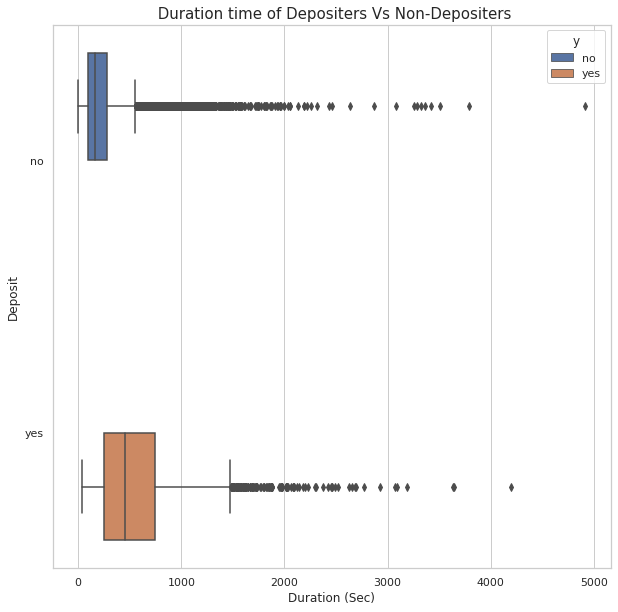

In [32]:
##
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",font_scale=1)


ax = sns.boxplot(x="duration", hue='y' , y = 'y', data = data_add_train)
ax.set(xlabel='Duration (Sec)', ylabel='Deposit')

plt.title(' Duration time of Depositers Vs Non-Depositers',fontsize = 15)


* The average time spent by a customer who subscribed to term deposit is slightly higher when compared to non-subscriber

In [193]:
pd.crosstab(data_add_train.previous,data_add_train.y)

y,no,yes
previous,,
0,32422,3141
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


* Even if we didn't contacted previously, the customer is more likely to subscribe,ideally a minimum of 3 contacts per customer has show the better outcomes.



## <font color = red > Bi-variate Analysis

Text(0.5, 1.0, ' Correlation Heat Map')

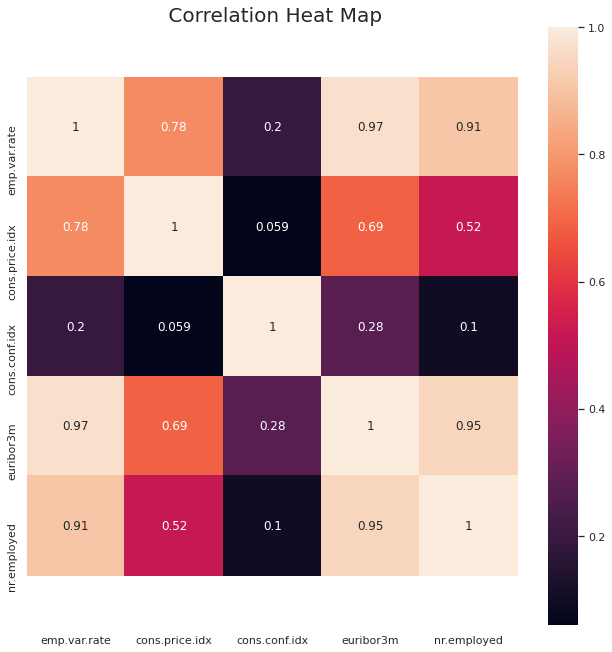

In [209]:
## Correlation Heat map on socio and economic features

df1 = data_add_train[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]

#correlations calculations
correlation = df1.corr()
# Heatmap
f, ax = plt.subplots(figsize=(11, 11))
ax =sns.heatmap(correlation,annot=True)
ax.set_ylim(bottom + 0.5, top - 0.5)
bottom, top = ax.get_ylim()

plt.title(' Correlation Heat Map', fontsize = 20)


In [33]:
## Feature Elination through VIF

df1 = data_add_train[['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
dff = df1.drop(['y'],axis = 1)
X = add_constant(dff)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const             528644.043254
duration          1.009454     
campaign          1.038282     
pdays             1.614844     
previous          1.796276     
emp.var.rate      33.060975    
cons.price.idx    6.337850     
cons.conf.idx     2.634548     
euribor3m         64.337875    
nr.employed       31.673747    
dtype: float64

* Generally, Numeric Varibles having VIF < 4 is acceptable and they are having moderate correlation with target feature. It won't give very high impact.


#### Please! go through Part-2 of Machine Learning Model development to know more about pre-processing, Feature Engineering and models that performed best
